In this notebook, simple imputations, KNN imputation and multivariate imputation are applied on the large amount of missing Gini index, since in panel.ipynb it shows that the data is not missing at complete random.

In [3]:
# from auxiliary import reg_with_imputed
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
import zipfile
import pandas as pd
import numpy as np


In [ ]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
long = pd.read_csv('data/result_long.csv')

#dropping out country have no gni obs
long_drop = long.groupby('isocode').filter(lambda x: x['gni'].count() > 0 )

n = long_drop.isocode.nunique()
y = long_drop.year.nunique()

ma = np.asarray(long_drop.gni).reshape(n, y).T

### 1. Simple Imputation
Replacing the missing values with the mean(introduces outlier, not recommand), median, or mode in a column

### pros:
- fast

### cons:
- doesn’t work well on categorical features
- doesn’t take correlations between features into account

In [10]:

imputer = SimpleImputer(strategy='median')
transformed_values = imputer.fit_transform(ma)

                                 OLS Regression Results                                
Dep. Variable:                    res   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.8219
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                       0.672
Time:                        01:34:02   Log-Likelihood:                         -236.20
No. Observations:                  70   AIC:                                      510.4
Df Residuals:                      51   BIC:                                      553.1
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

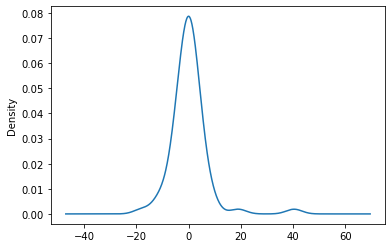

In [14]:
Quick_reg().reg_with_imputed(long_drop, transformed_values)

### 2. KNN Imputation
impute by finding the k nearest neighbors with the Euclidean distance matrix. 

### pros:
- more accurate than the simple imputation

### cons:
- computationally expensive
- sensitive to outliers

In [9]:

imputer = KNNImputer(n_neighbors=2) #define the k nearest neighbors   
transformed_values = imputer.fit_transform(ma)

                                 OLS Regression Results                                
Dep. Variable:                    res   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.8219
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                       0.672
Time:                        01:33:56   Log-Likelihood:                         -236.20
No. Observations:                  70   AIC:                                      510.4
Df Residuals:                      51   BIC:                                      553.1
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

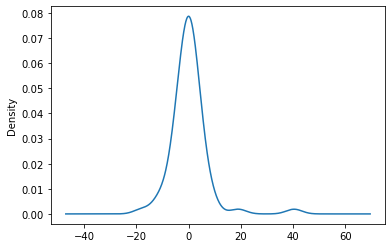

In [13]:
Quick_reg().reg_with_imputed(long_drop, transformed_values)

### 3. Multivariate Imputation
assumes data are missing at random, create m sets of sampling, analyze each set and combining the result 


### pros:
- solves the increased noise problem by factoring in other variables 

### cons:
- it's still an open question how useful univariate vs. multivariate imputation
- the package is still experimental & unstable

in stata, I also introduced the other year-varied variables to predict GNI, but considering the result yield not much different result and this package is not yet stable, I skipped that procedure here.

In [5]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(ma)
transformed_values = imp.transform(ma)

                                 OLS Regression Results                                
Dep. Variable:                    res   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.8219
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                       0.672
Time:                        01:33:41   Log-Likelihood:                         -236.20
No. Observations:                  70   AIC:                                      510.4
Df Residuals:                      51   BIC:                                      553.1
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

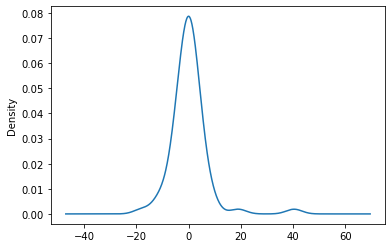

In [12]:
Quick_reg().reg_with_imputed(long_drop, transformed_values)